In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [281]:
df = pd.read_csv("../data/PacificData.csv")
df.tail()

,DATAFLOW,FREQ: Frequency,INDICATOR: Indicator,IMPORTER: Importer,EXPORTER: Exporter,COMMODITY: Commodity,TIME_PERIOD: Time,OBS_VALUE,UNIT_MEASURE: Unit of measure,UNIT_MULT: Unit multiplier,OBS_STATUS: Observation Status,DATA_SOURCE: Data source,OBS_COMMENT: Comment
6558,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2014,1822,TON: tonnes,NaN,NaN,NaN,NaN
6559,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2015,2070,TON: tonnes,NaN,NaN,NaN,NaN
6560,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2016,1874,TON: tonnes,NaN,NaN,NaN,NaN
6561,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2017,1978,TON: tonnes,NaN,NaN,NaN,NaN
6562,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2018,1207,TON: tonnes,NaN,NaN,NaN,NaN


In [282]:
df.columns

Index(['DATAFLOW', 'FREQ: Frequency', 'INDICATOR: Indicator',
       'IMPORTER: Importer', 'EXPORTER: Exporter', 'COMMODITY: Commodity',
       'TIME_PERIOD: Time', 'OBS_VALUE', 'UNIT_MEASURE: Unit of measure',
       'UNIT_MULT: Unit multiplier', 'OBS_STATUS: Observation Status',
       'DATA_SOURCE: Data source', 'OBS_COMMENT: Comment'],
      dtype='object')

In [283]:
df[df.columns[8]].value_counts()

TON: tonnes    6563
Name: UNIT_MEASURE: Unit of measure, dtype: int64

In [284]:
column_to_drop = ['DATAFLOW',
                  'FREQ: Frequency',
                  'INDICATOR: Indicator',
                  'EXPORTER: Exporter',
                  'UNIT_MEASURE: Unit of measure',
                  'UNIT_MULT: Unit multiplier',
                  'OBS_STATUS: Observation Status',
                  'DATA_SOURCE: Data source',
                  'OBS_COMMENT: Comment']
df = df.drop(column_to_drop,axis=1)

In [285]:
df.head()

,IMPORTER: Importer,COMMODITY: Commodity,TIME_PERIOD: Time,OBS_VALUE
0,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1995,13
1,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1996,29
2,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1997,19
3,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1998,28
4,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1999,35


In [286]:
df["IMPORTER: Importer"] = df["IMPORTER: Importer"].apply(lambda x: x.split(": ")[1])
df["COMMODITY: Commodity"] = df["COMMODITY: Commodity"].apply(lambda x: x.split(": ")[1])
df.head(2)

,IMPORTER: Importer,COMMODITY: Commodity,TIME_PERIOD: Time,OBS_VALUE
0,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1995,13
1,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1996,29


In [287]:
df["TIME_PERIOD: Time"] = pd.to_datetime(df["TIME_PERIOD: Time"],format='%Y')

In [288]:
df.describe()

,OBS_VALUE
count,6563.000000
mean,2522.195337
std,13836.508104
min,0.000000
25%,30.000000
50%,192.000000
75%,943.000000
max,278639.000000


In [289]:
df.shape

(6563, 4)

In [290]:
column_names = {"IMPORTER: Importer":"name",
                "COMMODITY: Commodity":"commodity",
                "TIME_PERIOD: Time":"date",
                "OBS_VALUE":"value"}
df.rename(columns=column_names,inplace=True)

In [291]:
df.head(2)

,name,commodity,date,value
0,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1995-01-01,13
1,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1996-01-01,29


In [292]:
df.iloc[27,1]

'Coffee, tea, mate and spices'

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6563 entries, 0 to 6562
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       6563 non-null   object        
 1   commodity  6563 non-null   object        
 2   date       6563 non-null   datetime64[ns]
 3   value      6563 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 205.2+ KB


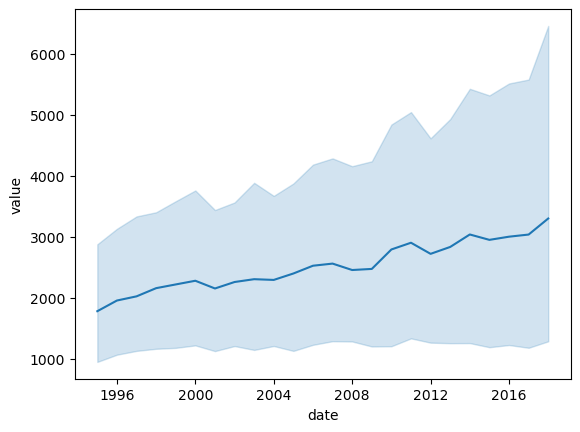

In [294]:
sns.lineplot(data=df, x="date", y="value")
plt.show()

In [295]:
fig = px.line(df, x="date", y="value", color='name')
fig.show()

In [296]:
df_year = df.groupby(["name","date"]).sum().reset_index()
fig = px.line(df_year, x="date", y="value", color='name')
fig.show()

In [297]:
df.groupby(["commodity"]).sum().sort_values(by="value")

,value
commodity,
"Coffee, tea, mate and spices",18665
Cocoa and cocoa preparations,26764
Tobacco and manufactured tobacco substitutes,39684
"Oil seed, oleagic fruits, grain, seed, fruit, etc, ne",95373
"Fish, crustaceans, molluscs, aquatic invertebrates ne",111662
"Meat, fish and seafood food preparations nes",113441
Miscellaneous edible preparations,234220
"Cereal, flour, starch, milk preparations and products",253227
"Edible fruit, nuts, peel of citrus fruit, melons",289400


In [298]:
df_year

,name,date,value
0,Cook Islands,1995-01-01,5211
1,Cook Islands,1996-01-01,5457
2,Cook Islands,1997-01-01,5827
3,Cook Islands,1998-01-01,6430
4,Cook Islands,1999-01-01,6910
...,...,...,...
406,Wallis and Futuna Islands,2014-01-01,773
407,Wallis and Futuna Islands,2015-01-01,489
408,Wallis and Futuna Islands,2016-01-01,1112
409,Wallis and Futuna Islands,2017-01-01,1421


In [299]:
df_year = df_year[df_year.name != "Tokelau"]

In [300]:
#df_year = df_year.pivot_table(index='Year', columns='Importer', values='Tons', aggfunc='sum')

In [301]:
#not enough data for Tokelau, so remove
df = df[df['name'] != 'Tokelau']
df_year =df_year[df_year.name != "Tokelau"]
df.shape

(6540, 4)

In [302]:
df_year.to_csv("../data/CountryYearly.csv",index=False)